In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
import pandas as pd

In [2]:
dataset = {
    'k':[[1,2], [2,3], [3,1]],
    'r':[[6,5], [7,7], [8,6]]
}
new_point = [5,7]

In [3]:
dataset

{'k': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}

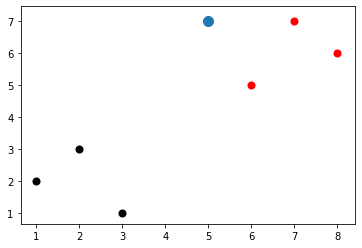

In [4]:
[[plt.scatter(ii[0], ii[1], s=50, color =i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100)

In [5]:
def k_nearest_neighbors(data, predict, k=3, verbose = False):
    
    if len(data)>=k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
        
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt(feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d= np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))
            d = np.linalg.norm(np.array(feature)-np.array(predict))
            distances.append([d, group])
    
    if verbose == True:
        print(distances)
    
    votes = (i[1] for i in sorted(distances)[:k])#Sorted ordena la primera columna y con el [:k] me quedo con los k primeros 
    if verbose == True:
        print("Los votos son:", votes)
    
    vote_result = Counter(votes).most_common(1)
    if verbose == True:
        print(vote_result)
    
    return vote_result[0][0]#[('r', 2), ('k', 1)]

In [6]:
result = k_nearest_neighbors(dataset, new_point)
result 

'r'

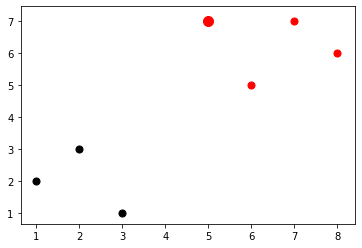

In [7]:
[[plt.scatter(ii[0], ii[1], s=50, color =i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

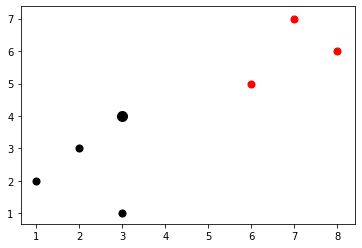

In [8]:
new_point =[3,4]
result = k_nearest_neighbors(dataset, new_point)
[[plt.scatter(ii[0], ii[1], s=50, color =i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

## Aplicando el KNN al Dataset del cancer

In [9]:
df = pd.read_csv("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/datasets/cancer/breast-cancer-wisconsin.data.txt", header = None)

In [10]:
df.replace("?", -99999, inplace=True)

In [11]:
df.columns =["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]

In [12]:
df = df.drop(["name"], 1)

In [13]:
full_data = df.astype(float).values.tolist()

In [14]:
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [15]:
import random

In [16]:
random.shuffle(full_data)

In [17]:
test_size = 0.2

In [18]:
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_set, test_set

({2: [], 4: []}, {2: [], 4: []})

In [19]:
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [20]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])    
    

In [21]:
test_set

{2: [[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [2.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, -99999.0, 3.0, 1.0, 1.0],
  [3.0, 3.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0, 3.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0],
  [5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0,

In [24]:
correct = 0
total = 0 
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct +=1
        total += 1

print("La eficacia del KNN =",correct/total) 
    

La eficacia del KNN = 0.9712230215827338
